## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [1]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

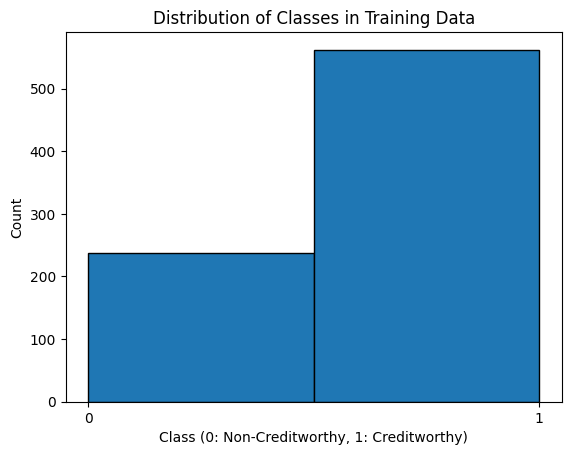

In [3]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [4]:
# Обучение Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Прогноз на тестовых данных
rf_pred = rf_model.predict(X_test)

# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Прогноз на тестовых данных
gb_pred = gb_model.predict(X_test)

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")

Random Forest метрики:
ROC AUC: 0.68
Accuracy: 0.76
Precision: 0.78
Recall: 0.90

Gradient Boosting метрики:
ROC AUC: 0.67
Accuracy: 0.73
Precision: 0.79
Recall: 0.84


In [5]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
mlp_model = MLPClassifier(hidden_layer_sizes=(30,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Прогноз на тестовых данных
mlp_pred = mlp_model.predict(X_test)

# Расчет метрик для MLP нейронной сети
mlp_roc_auc = roc_auc_score(y_test, mlp_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")


MLP (Neural Network) метрики:
ROC AUC: 0.56
Accuracy: 0.65
Precision: 0.72
Recall: 0.79


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели
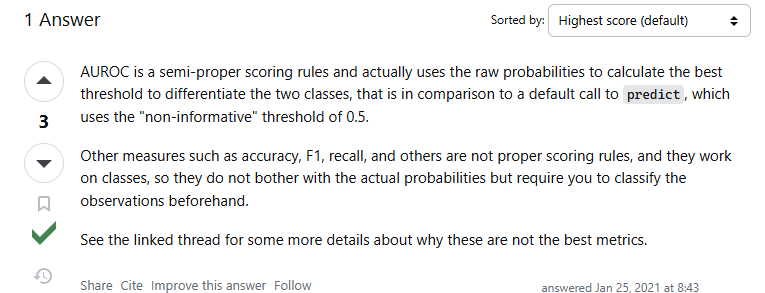

Результаты roc_auc буду считать по predict_proba

# Результаты
Это лучшие варианты, которые мне удалось подобрать без применения модификаций к исходному набору данных и без изменения random state.
Random Forest ROC AUC = 0.81,
Gradient Boosting ROC AUC = 0.81,
MLP ROC AUC = 0.80.
У MLP, скорее всего, можно получить показатель выше, если поменять random state, но я не уверен, что в этом задании можно так делать.

In [6]:
# RANDOM FOREST, ROC_AUC = 0.81

rf_model = RandomForestClassifier(n_estimators = 109, max_leaf_nodes = None, max_depth = 10, criterion = 'entropy', class_weight = 'balanced_subsample', min_samples_split = 45, random_state=42) # 0.81 -- фаворит

rf_model.fit(X_train, y_train)

# Прогноз на тестовых данных
rf_pred = rf_model.predict(X_test)
rf_predict_proba = rf_model.predict_proba(X_test)[:, 1]
# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_predict_proba)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

Random Forest метрики:
ROC AUC: 0.81
Accuracy: 0.77
Precision: 0.86
Recall: 0.80


In [7]:
# GRADIENT BOOSTING, ROC_AUC = 0.81

gb_model = GradientBoostingClassifier(random_state=42, subsample = 0.27, n_estimators = 17, min_impurity_decrease = 0.02, max_leaf_nodes = None, max_depth = 3, learning_rate = 0.01, min_weight_fraction_leaf=0.01) # 0.81 -- фаворит
gb_model.fit(X_train, y_train)

# Прогноз на тестовых данных
gb_pred = gb_model.predict(X_test)
gb_pred_proba = gb_model.predict_proba(X_test)[:, 1]
# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred_proba)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")


Gradient Boosting метрики:
ROC AUC: 0.81
Accuracy: 0.69
Precision: 0.69
Recall: 1.00


In [8]:
mlp_model = MLPClassifier(random_state=42, solver = 'lbfgs', max_iter = 800, learning_rate = 'constant', hidden_layer_sizes = (19,), activation = 'relu') # 0.80 -- фаворит
mlp_model.fit(X_train, y_train)

# Прогноз на тестовых данных
mlp_pred = mlp_model.predict(X_test)
mlp_pred_proba = mlp_model.predict_proba(X_test)[:, 1]

mlp_roc_auc = roc_auc_score(y_test, mlp_pred_proba)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")


MLP (Neural Network) метрики:
ROC AUC: 0.80
Accuracy: 0.79
Precision: 0.80
Recall: 0.92


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# Подбор гиперпараметров

... не стоит пытаться здесь разобраться...

In [304]:
# Определение сетки параметров для RandomForestClassifier
rf_grid = {
    'n_estimators': [2, 5, 10, 20, 50, 100],
    'max_depth': [None, 2, 5, 10, 20, 50, 100],
    'criterion' : ['gini', 'entropy'],
    'class_weight': [None, 'balanced', 'balanced_subsample'],
    'max_leaf_nodes': [None, 2, 5, 20, 50, 100],
}

#Настройка гиперпараметров для RandomForestClassifier
# rf_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_grid, cv=5, scoring='roc_auc')
# rf_search.fit(X_train, y_train)

# best_params = rf_search.best_params_
# print(best_params)

# rf_random = RandomizedSearchCV(
#     RandomForestClassifier(random_state=42),
#     param_distributions=rf_grid,
#     n_iter=200,
#     cv=5,
#     scoring='roc_auc',
#     random_state=42,
#     n_jobs=-1 #
# )
# rf_random.fit(X_train, y_train)
# best_params = rf_random.best_params_
# print(best_params)

# rf_model = RandomForestClassifier(random_state = 42, **best_params)

#rf_model = RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=42) # 0.79
#rf_model = RandomForestClassifier(criterion='gini', n_estimators=20, max_leaf_nodes = 50, max_depth = 20,  random_state=42, class_weight = 'balanced') # 0.79
#rf_model = RandomForestClassifier(n_estimators = 100, max_leaf_nodes = None, max_depth = 10, criterion = 'gini', class_weight = 'balanced', random_state=42) # 0.78
#rf_model = RandomForestClassifier(n_estimators = 200, max_leaf_nodes = None, max_depth = 10, criterion = 'entropy', class_weight = 'balanced_subsample', random_state=42) # 0.79

# best_estimators_count = 0
# best_roc_auc = 0

# for n_est in range(1,300):
#    rf_model = RandomForestClassifier(n_estimators = n_est, max_leaf_nodes = None, max_depth = 10, criterion = 'entropy', class_weight = 'balanced_subsample', random_state=42)
#    rf_model.fit(X_train, y_train)
#    rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]
#    rf_roc_auc = roc_auc_score(y_test, rf_pred_proba)
#    if rf_roc_auc > best_roc_auc:
#      best_roc_auc = rf_roc_auc
#      best_estimators_count = n_est
# print(best_roc_auc, best_estimators_count)

#rf_model = RandomForestClassifier(n_estimators = 109, max_leaf_nodes = None, max_depth = 10, criterion = 'entropy', class_weight = 'balanced_subsample', random_state=42) #  0.8

# best_min_samples_split = 0
# best_roc_auc = 0

# for mss in range(2,100):
#    rf_model = RandomForestClassifier(n_estimators = 109, max_leaf_nodes = None, min_samples_split = mss, max_depth = 10, criterion = 'entropy', class_weight = 'balanced_subsample', random_state=42)
#    rf_model.fit(X_train, y_train)
#    rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]
#    rf_roc_auc = roc_auc_score(y_test, rf_pred_proba)
#    if rf_roc_auc > best_roc_auc:
#      best_roc_auc = rf_roc_auc
#      min_samples_split = mss
# print(best_roc_auc, min_samples_split)

rf_model = RandomForestClassifier(n_estimators = 109, max_leaf_nodes = None, max_depth = 10, criterion = 'entropy', class_weight = 'balanced_subsample', min_samples_split = 45, random_state=42) # 0.81 -- фаворит

rf_model.fit(X_train, y_train)

# Прогноз на тестовых данных
rf_pred = rf_model.predict(X_test)
rf_predict_proba = rf_model.predict_proba(X_test)[:, 1]
# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_predict_proba)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")









# Настройка гиперпараметров для GradientBoostingClassifier
gb_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 2, 10, 20, 50, 100],
   # 'criterion' : ['friedman_mse'], # mse, mae, deviance, exponential
    'max_leaf_nodes': [None, 2, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_impurity_decrease': [0.01, 0.00, 0.02],
    'subsample': [0.1, 0.3, 0.5, 1]

}

#gb_search = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_grid, cv=5, scoring='roc_auc')
#gb_search.fit(X_train, y_train)

#best_params = gb_search.best_params_
#print(best_params)

# gb_random = RandomizedSearchCV(
#     GradientBoostingClassifier(random_state=42),
#     param_distributions=gb_grid,
#     n_iter=100,
#     cv=5,
#     scoring='roc_auc',
#     random_state=42,
#     n_jobs=-1 #
# )
# gb_random.fit(X_train, y_train)
# best_params = gb_random.best_params_
# print(best_params)
# gb_model = GradientBoostingClassifier(random_state=42, **best_params)

#gb_model = GradientBoostingClassifier(random_state=42, criterion = 'friedman_mse', max_depth = 10, max_leaf_nodes = 50, n_estimators = 100) # 0.73
#gb_model = GradientBoostingClassifier(random_state=42, subsample = 0.5, n_estimators = 150, min_impurity_decrease = 0.02, max_leaf_nodes = 20, max_depth = 100, learning_rate = 0.01) # 0.77
#gb_model = GradientBoostingClassifier(random_state=42, subsample = 0.6, n_estimators = 150, min_impurity_decrease = 0.02, max_leaf_nodes = 20, max_depth = 100, learning_rate = 0.01) # 0.78
#gb_model = GradientBoostingClassifier(random_state=42, subsample = 0.6, n_estimators = 200, min_impurity_decrease = 0.02, max_leaf_nodes = 20, max_depth = 1, learning_rate = 0.01, min_weight_fraction_leaf=0.01)  # 0.79
#gb_model = GradientBoostingClassifier(random_state=42, subsample = 0.3, n_estimators = 200, min_impurity_decrease = 0.02, max_leaf_nodes = None, max_depth = 3, learning_rate = 0.01, min_weight_fraction_leaf=0.01)

# best_estimators_count = 0
# best_subsample = 0
# best_roc_auc = 0
# for n_est in range(1,300):
#   gb_model = GradientBoostingClassifier(random_state=42, subsample = 0.3, n_estimators = n_est, min_impurity_decrease = 0.02, max_leaf_nodes = None, max_depth = 3, learning_rate = 0.01, min_weight_fraction_leaf=0.01)
#   gb_model.fit(X_train, y_train)
#   gb_pred_proba = gb_model.predict_proba(X_test)[:, 1]
#   gb_roc_auc = roc_auc_score(y_test, gb_pred_proba)
#   if gb_roc_auc > best_roc_auc:
#     best_roc_auc = gb_roc_auc
#     best_estimators_count = n_est
# print(best_roc_auc, best_estimators_count)

#gb_model = GradientBoostingClassifier(random_state=42, subsample = 0.3, n_estimators = 17, min_impurity_decrease = 0.02, max_leaf_nodes = None, max_depth = 3, learning_rate = 0.01, min_weight_fraction_leaf=0.01) # 0.804

# best_subsample = 0
# best_roc_auc = 0

# for subs in [i * 0.01 for i in range(1, 101)]:
#   gb_model = GradientBoostingClassifier(random_state=42, subsample = subs, n_estimators = 17, min_impurity_decrease = 0.02, max_leaf_nodes = None, max_depth = 3, learning_rate = 0.01, min_weight_fraction_leaf=0.01)
#   gb_model.fit(X_train, y_train)
#   gb_pred_proba = gb_model.predict_proba(X_test)[:, 1]
#   gb_roc_auc = roc_auc_score(y_test, gb_pred_proba)
#   if gb_roc_auc > best_roc_auc:
#     best_roc_auc = gb_roc_auc
#     best_subsample = subs
# print(best_roc_auc, best_subsample)


gb_model = GradientBoostingClassifier(random_state=42, subsample = 0.27, n_estimators = 17, min_impurity_decrease = 0.02, max_leaf_nodes = None, max_depth = 3, learning_rate = 0.01, min_weight_fraction_leaf=0.01) # 0.81 -- фаворит

gb_model.fit(X_train, y_train)

# Прогноз на тестовых данных
gb_pred = gb_model.predict(X_test)
gb_pred_proba = gb_model.predict_proba(X_test)[:, 1]
# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred_proba)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")


# Настройка гиперпараметров для MLP

mlp_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (30, 30, 30)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': list(range(100, 1001, 100))
}



#mlp_search = GridSearchCV(MLPClassifier(random_state=42), mlp_grid, cv=5, scoring='roc_auc')
#mlp_search.fit(X_train, y_train)

#best_params = mlp_search.best_params_
#print(best_params)

# mlp_random = RandomizedSearchCV(
#     MLPClassifier(random_state=42),
#     param_distributions=mlp_grid,
#     n_iter=800,
#     cv=5,
#     scoring='roc_auc',
#     random_state=42,
#     n_jobs=-1 #
# )
# mlp_random.fit(X_train, y_train)
# best_params = mlp_random.best_params_
# print(best_params)
# mlp_model = MLPClassifier(random_state=42, **best_params)


#mlp_model = MLPClassifier(random_state=42, solver = 'lbfgs', max_iter = 800, learning_rate = 'constant', hidden_layer_sizes = (80,), activation = 'relu') # 0.79

best_layer_size = 0
best_roc_auc = 0
# for i in range(1,200):
#   mlp_model = MLPClassifier(random_state=42, solver = 'lbfgs', max_iter = 800, learning_rate = 'constant', hidden_layer_sizes = (i,), activation = 'relu')
#   mlp_model.fit(X_train, y_train)
#   mlp_pred_proba = mlp_model.predict_proba(X_test)[:, 1]
#   mlp_roc_auc = roc_auc_score(y_test, mlp_pred_proba)
#   if mlp_roc_auc > best_roc_auc:
#     best_roc_auc = mlp_roc_auc
#     best_layer_size = i
# print(best_roc_auc, best_layer_size)

mlp_model = MLPClassifier(random_state=42, solver = 'lbfgs', max_iter = 800, learning_rate = 'constant', hidden_layer_sizes = (19,), activation = 'relu') # 0.80
mlp_model.fit(X_train, y_train)

# Прогноз на тестовых данных
mlp_pred = mlp_model.predict(X_test)
mlp_pred_proba = mlp_model.predict_proba(X_test)[:, 1]

mlp_roc_auc = roc_auc_score(y_test, mlp_pred_proba)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.3f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")

Random Forest метрики:
ROC AUC: 0.81
Accuracy: 0.77
Precision: 0.86
Recall: 0.80

Gradient Boosting метрики:
ROC AUC: 0.81
Accuracy: 0.69
Precision: 0.69
Recall: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

0.7978027115474521 593

MLP (Neural Network) метрики:
ROC AUC: 0.800
Accuracy: 0.79
Precision: 0.80
Recall: 0.92


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
